# Modelos de Propagação

Propagação no espaço livre

Comprimento de onda: 0.6928406466512702 m
EL - Atenuação do sinal: 85.17153011311599dB para d= 1000 m
EL - Atenuação do sinal: 91.19213002639562dB para d= 2000 m
EL - Atenuação do sinal: 94.71395520750923dB para d= 3000 m
EL - Atenuação do sinal: 97.21272993967523dB para d= 4000 m
EL - Atenuação do sinal: 99.15093019983637dB para d= 5000 m
EL - Atenuação do sinal: 100.73455512078885dB para d= 6000 m
EL - Atenuação do sinal: 102.07349091340112dB para d= 7000 m


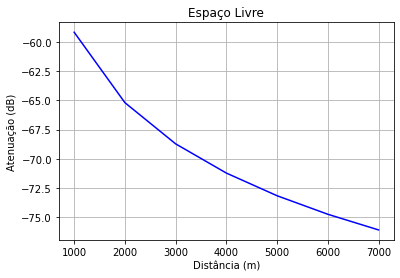

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

Ptx=10 #dBm
Gtx=12 #dB
Grx=4  #dB

c=3*10**8
f=433*10**6
lamb=c/f
print("Comprimento de onda: " + str(lamb) + " m")
dist = [ 1000, 2000, 3000, 4000, 5000, 6000, 7000]
L=np.zeros(len(dist))
Prx=np.zeros(len(dist))
Lhata=np.zeros(len(dist))
for i in range(len(dist)):
    L[i] = 20*math.log10((4*math.pi*dist[i])/lamb)
    Prx[i] = Ptx + Gtx + Grx - L[i]
    print("EL - Atenuação do sinal: " + str(L[i]) + "dB" + " para d= "+str(dist[i]) + " m")

plt.figure(0)
plt.plot(dist, Prx, color = 'blue')
plt.title('Espaço Livre')
plt.xlabel('Distância (m)')
plt.ylabel('Atenuação (dB)')
plt.grid()
plt.show()


Modelo Okumura/HATA

Fator de correção: 0.5945882903072617
Hata - Atenuação do sinal: 128.5621935866656dB para d= 1000 m
Hata - Atenuação do sinal: 138.72850228057612dB para d= 2000 m
Hata - Atenuação do sinal: 144.67541163726926dB para d= 3000 m
Hata - Atenuação do sinal: 148.89481097448666dB para d= 4000 m
Hata - Atenuação do sinal: 152.16763136435412dB para d= 5000 m
Hata - Atenuação do sinal: 154.8417203311798dB para d= 6000 m
Hata - Atenuação do sinal: 157.10263033767237dB para d= 7000 m


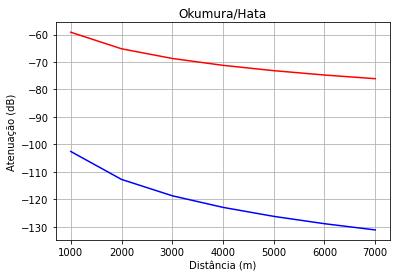

In [ ]:
f=1500*10**6
ht=50
hr=1.7
Ptx=10 #dBm
Gtx=12 #dB
Grx=4  #dB
Prxh=np.zeros(len(dist))
fcorrecao = (1.1*math.log10(f/10**6) - 0.7)*hr - (1.56*math.log10(f/10**6) - 0.8)
print("Fator de correção: " + str(fcorrecao))

Lhata=np.zeros(len(dist))
for i in range(len(dist)):
    Lhata[i] = 69.55 + 26.16*math.log10(f/10**6) -13.82*math.log10(ht) - fcorrecao + (44.9 - 6.55*math.log10(ht))*math.log10(dist[i]/1000)
    Prxh[i] = Ptx + Gtx + Grx - Lhata[i]
    print("Hata - Atenuação do sinal: " + str(Lhata[i]) + "dB" + " para d= "+str(dist[i]) + " m")

plt.figure(1)
plt.plot(dist, Prx, color = 'red')
plt.plot(dist, Prxh, color = 'blue')
plt.title('Okumura/Hata')
plt.xlabel('Distância (m)')
plt.ylabel('Atenuação (dB)')
plt.grid()


Modelo Propagação Indoor ITU

Indoor - Atenuação do sinal: 79.79144688900183 dB
Indoor - Atenuação do sinal: 86.41410679360942 dB
Indoor - Atenuação do sinal: 90.28811449283441 dB
Indoor - Atenuação do sinal: 93.03676669821701 dB
Indoor - Atenuação do sinal: 95.16878698439425 dB
Indoor - Atenuação do sinal: 96.910774397442 dB
Indoor - Atenuação do sinal: 98.38360376931549 dB
Indoor - Atenuação do sinal: 99.6594266028246 dB


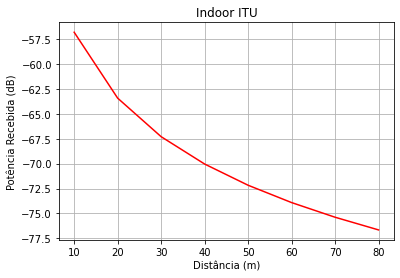

In [ ]:
N = 22 #coeficiente de perda para paredes de concreto e tijolos
Pf = 11 #Fator de penetração para antenas no mesmo andar
d_indoor = [ 10, 20, 30, 40, 50, 60, 70 ,80] #distância entre antenas (em metros)
f = 5490*10**6  #em MHz
Ptotal = 23 #dBm

L_ITU = np.zeros(len(d_indoor))
PrxWifi = np.zeros(len(d_indoor))
for j in range(len(d_indoor)):
  L_ITU[j] = 20*math.log10(f/10**6) + N*math.log10(d_indoor[j]) + Pf - 28
  PrxWifi[j] = Ptotal - L_ITU[j] 
  print("Indoor - Atenuação do sinal: " + str(L_ITU[j]) + " dB")

plt.figure(2)
plt.plot(d_indoor, PrxWifi, color = 'red')
plt.title('Indoor ITU')
plt.xlabel('Distância (m)')
plt.ylabel('Potência Recebida (dB)')
plt.grid()